In [10]:
import pandas as pd
import folium

# Carregando o arquivo CSV
df = pd.read_csv('votos-2020.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 100000000
df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 100000000

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Adicionando marcadores para cada local de votação
for index, row in df.iterrows():
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=row['nm_local_votacao'],
      icon=folium.Icon(color='blue', icon='fa-map-marker-alt')
  ).add_to(mapa)

# Exibindo o mapa
mapa

In [12]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Carregando o arquivo CSV
df = pd.read_csv('votos-2020.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 100000000
df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 100000000

# Substituindo valores NaN por 0 na coluna 'qt_votos_jhancy'
df['qt_votos_jhancy'] = df['qt_votos_jhancy'].fillna(0)

# Criando a lista de coordenadas e votos da Jhancy
heat_data = [[row['latitude'], row['longitude'], row['qt_votos_jhancy']] for index, row in df.iterrows()]

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Adicionando o mapa de calor
HeatMap(heat_data, radius=15).add_to(mapa)

# Exibindo o mapa
mapa

In [19]:
import pandas as pd
import folium

# Carregando o arquivo CSV
df = pd.read_csv('votos-2020.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 100000000
df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 100000000

# Substituindo valores NaN por 0 na coluna 'qt_votos_jhancy'
df['qt_votos_jhancy'] = df['qt_votos_jhancy'].fillna(0)

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Definindo a função para obter a cor do marcador
def get_marker_color(votos):
  if votos >= 20:
    return 'darkgreen'
  elif votos >= 10:
    return 'green'
  elif votos >= 5:
    return 'lightgreen'
  elif votos >= 1:
    return 'purple'
  else:
    return 'red'

# Adicionando marcadores com cores dinâmicas
for index, row in df.iterrows():
  cor_marcador = get_marker_color(row['qt_votos_jhancy'])
  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=f"{row['nm_local_votacao']}<br>Votos da Jhancy: {row['qt_votos_jhancy']}",
      icon=folium.Icon(color=cor_marcador, icon='fa-vote-yea')
  ).add_to(mapa)

# Exibindo o mapa
mapa

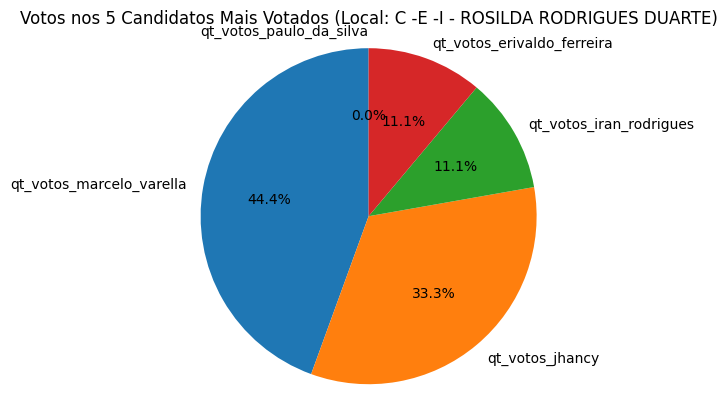

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV
df = pd.read_csv('votos-2020.csv', sep=',')

# Convertendo latitude e longitude para float (se necessário)
# df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 100000000
# df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 100000000

# Substituindo valores NaN por 0 em todas as colunas de votos
votos_cols = ['qt_votos_paulo_da_silva', 'qt_votos_luzivam_oliveira', 'qt_votos_joao_maria_pereira',
              'qt_votos_iran_rodrigues', 'qt_votos_aricelio_nascimento', 'qt_votos_carlos_andre_ribeiro',
              'qt_votos_marcelo_varella', 'qt_votos_erivaldo_ferreira', 'qt_votos_geisha', 'qt_votos_jhancy',
              'qt_votos_jose_antonio_da_silveira', 'qt_votos_leilson']
df[votos_cols] = df[votos_cols].fillna(0)

# Criando um DataFrame com os 5 candidatos mais votados em cada local
top5_candidates = []
for index, row in df.iterrows():
  # Ordenando os votos em ordem decrescente
  votos_ordenados = row[votos_cols].sort_values(ascending=False)
  # Selecionando os 5 primeiros candidatos
  top5 = votos_ordenados.head(5)
  # Adicionando a lista de candidatos e votos ao DataFrame
  top5_candidates.append(top5.to_dict())

# Criando um gráfico de pizza para o primeiro local de votação como exemplo
local_index = 0  # Índice do local de votação
votos_local = top5_candidates[local_index]

labels = list(votos_local.keys())
sizes = list(votos_local.values())

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title(f'Votos nos 5 Candidatos Mais Votados (Local: {df.iloc[local_index]["nm_local_votacao"]})')
plt.show()

In [66]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import matplotlib.colors as mcolors

# Carregando o arquivo CSV
df = pd.read_csv('votos-2020.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 100000000
df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 100000000

# Substituindo valores NaN por 0 em todas as colunas de votos
votos_cols = ['qt_votos_paulo_da_silva', 'qt_votos_luzivam_oliveira', 'qt_votos_joao_maria_pereira',
              'qt_votos_iran_rodrigues', 'qt_votos_aricelio_nascimento', 'qt_votos_carlos_andre_ribeiro',
              'qt_votos_marcelo_varella', 'qt_votos_erivaldo_ferreira', 'qt_votos_geisha', 'qt_votos_jhancy',
              'qt_votos_jose_antonio_da_silveira', 'qt_votos_leilson']
df[votos_cols] = df[votos_cols].fillna(0)

# Criando um DataFrame com os 3 candidatos mais votados em cada local
top3_candidates = []
for index, row in df.iterrows():
  # Ordenando os votos em ordem decrescente
  votos_ordenados = row[votos_cols].sort_values(ascending=False)
  # Selecionando os 3 primeiros candidatos
  top3 = votos_ordenados.head(3)
  # Adicionando a lista de candidatos e votos ao DataFrame
  top3_candidates.append(top3.to_dict())

# Definindo as cores dos candidatos (com conversão para RGB)
candidate_colors = {
    'qt_votos_paulo_da_silva': mcolors.to_rgb('lightblue'),
    'qt_votos_luzivam_oliveira': mcolors.to_rgb('green'),
    'qt_votos_joao_maria_pereira': mcolors.to_rgb('darkgreen'),
    'qt_votos_iran_rodrigues': mcolors.to_rgb('blue'),
    'qt_votos_aricelio_nascimento': mcolors.to_rgb('lightgreen'),
    'qt_votos_carlos_andre_ribeiro': mcolors.to_rgb('pink'),
    'qt_votos_marcelo_varella': mcolors.to_rgb('orange'),
    'qt_votos_erivaldo_ferreira': mcolors.to_rgb('cadetblue'),
    'qt_votos_geisha': mcolors.to_rgb('purple'),
    'qt_votos_jhancy': mcolors.to_rgb('red'),
    'qt_votos_jose_antonio_da_silveira': mcolors.to_rgb('black'),
    'qt_votos_leilson': mcolors.to_rgb('gray'),
}

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Função para criar o gráfico de pizza em base64
def create_pie_chart_base64(votos_local):
  labels = list(votos_local.keys())
  sizes = list(votos_local.values())
  colors = [candidate_colors[label] for label in labels]

  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
  ax.axis('equal')

  # Salvar o gráfico em um buffer
  buf = BytesIO()
  plt.savefig(buf, format='png')
  buf.seek(0)

  # Codificar o gráfico em base64
  img_base64 = base64.b64encode(buf.getvalue()).decode('utf-8')
  return img_base64

# Adicionando marcadores com popups de gráficos de pizza
for index, row in df.iterrows():
  votos_local = top3_candidates[index]
  img_base64 = create_pie_chart_base64(votos_local)
  popup = folium.Popup(
      f"<img src='data:image/png;base64,{img_base64}' width='300' height='300'>",
      max_width=300,
      max_height=300
  )

  # Definir a cor do marcador com base no candidato mais votado
  top_candidate = list(votos_local.keys())[0]
  marker_color = candidate_colors[top_candidate]

  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=popup,
      icon=folium.Icon(color=marker_color, icon='fa-vote-yea')
  ).add_to(mapa)

# Exibindo o mapa
mapa

Output hidden; open in https://colab.research.google.com to view.

In [70]:
import pandas as pd
import folium

# Carregando o arquivo CSV
df = pd.read_csv('votos-2020.csv', sep=',')

# Convertendo latitude e longitude para float
df['latitude'] = df['latitude'].str.replace('.', '').astype(float) / 100000000
df['longitude'] = df['longitude'].str.replace('.', '').astype(float) / 100000000

# Substituindo valores NaN por 0 em todas as colunas de votos
votos_cols = ['qt_votos_paulo_da_silva', 'qt_votos_luzivam_oliveira', 'qt_votos_joao_maria_pereira',
              'qt_votos_iran_rodrigues', 'qt_votos_aricelio_nascimento', 'qt_votos_carlos_andre_ribeiro',
              'qt_votos_marcelo_varella', 'qt_votos_erivaldo_ferreira', 'qt_votos_geisha', 'qt_votos_jhancy',
              'qt_votos_jose_antonio_da_silveira', 'qt_votos_leilson']
df[votos_cols] = df[votos_cols].fillna(0)

# Criando o mapa centrado em Ceará-Mirim
mapa = folium.Map(location=[-5.6383, -35.4318], zoom_start=12)

# Adicionando marcadores com cores dinâmicas
for index, row in df.iterrows():
  votos_jhancy = row['qt_votos_jhancy']
  votos_iran = row['qt_votos_iran_rodrigues']

  if votos_jhancy > votos_iran:
    marker_color = 'green'  # Jhancy tem mais votos
  elif votos_jhancy < votos_iran:
    marker_color = 'red'  # Iran tem mais votos
  else:
    marker_color = 'gray'  # Empate

  folium.Marker(
      location=[row['latitude'], row['longitude']],
      popup=f"{row['nm_local_votacao']}<br>Jhancy: {votos_jhancy} votos<br>Iran: {votos_iran} votos",
      icon=folium.Icon(color=marker_color, icon='fa-vote-yea')
  ).add_to(mapa)

# Exibindo o mapa
mapa